In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results/wandb_export_2023-02-25T16_52_47.295-07_00.csv')[::-1]
df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,batch_size,model_type,seed,accuracy,best_epoch,best_val_loss,epoch,loss,lr,val_accuracy,val_loss,wrong_class
39,cnn2-1,finished,-,hudwahab,NaN,2023-02-22T16:49:28.000Z,964,NaN,128,cnn2,1,0.99884,37,0.011512,62,0.003569,3.000000e-07,0.9950,0.013529,9.0
38,cnn2-2,finished,-,hudwahab,NaN,2023-02-22T17:05:34.000Z,631,NaN,128,cnn2,2,0.99892,54,0.012901,79,0.003098,3.000000e-08,0.9952,0.013680,9.0
37,cnn2-3,finished,-,hudwahab,NaN,2023-02-22T17:16:07.000Z,453,NaN,128,cnn2,3,0.99860,34,0.012496,59,0.003769,3.000000e-07,0.9948,0.013866,11.0
36,cnn2-4,finished,-,hudwahab,NaN,2023-02-22T17:23:42.000Z,574,NaN,128,cnn2,4,0.99884,47,0.013190,72,0.002472,3.000000e-07,0.9954,0.014425,9.0
35,cnn3-0,finished,-,hudwahab,NaN,2023-02-22T17:33:18.000Z,871,NaN,128,cnn3,0,0.99980,50,0.009561,75,0.000501,3.000000e-07,0.9972,0.010131,9.0


In [4]:
df['runtime_min'] = df['Runtime'] / 60

In [5]:
df.groupby('model_type').agg(['max','min','mean'])[['wrong_class','best_epoch','runtime_min']]

<ipython-input-5-2ebeb2bbdf8a>:1: FutureWarning: ['Name', 'State', 'Notes', 'User', 'Created'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('model_type').agg(['max','min','mean'])[['wrong_class','best_epoch','runtime_min']]


wrong_class            best_epoch                runtime_min  \
                   max  min  mean        max min       mean         max   
model_type                                                                
cnn2              11.0  9.0   9.5         54  34  43.000000   16.066667   
cnn3              21.0  5.0  11.8         61  43  52.400000   16.533333   
cnn6               3.0  2.0   2.2         96  66  79.800000   60.583333   
cnn_bn            14.0  8.0  11.4         52  31  44.400000   13.583333   
inc3               6.0  0.0   2.8         40  26  32.200000   26.616667   
inc6               1.0  0.0   0.5         47  21  30.666667   41.716667   
resnet             1.0  1.0   1.0         45   0  28.250000  176.566667   
vgg               13.0  6.0   9.0        110  54  72.600000   14.516667   

                                  
                  min       mean  
model_type                        
cnn2         7.550000  10.925000  
cnn3        12.583333  14.543333  
cnn6        48.550000  54.560000  
cnn_bn      10.583333  12.183333  
inc3        20.616667  23.216667  
inc6        14.016667  29.138889  
resnet       6.016667  90.662500  
vgg         10.516667  11.930000

In [6]:
df[['Name','model_type','accuracy','wrong_class']].groupby('model_type').head()

,Name,model_type,accuracy,wrong_class
39,cnn2-1,cnn2,0.99884,9.0
38,cnn2-2,cnn2,0.99892,9.0
37,cnn2-3,cnn2,0.99860,11.0
36,cnn2-4,cnn2,0.99884,9.0
35,cnn3-0,cnn3,0.99980,9.0
34,cnn3-1,cnn3,0.99992,9.0
33,cnn3-2,cnn3,0.99940,15.0
32,cnn3-3,cnn3,0.99996,5.0
31,cnn3-4,cnn3,0.99956,21.0
30,cnn6-0,cnn6,0.99828,2.0


In [7]:
df[['Name','model_type','accuracy','wrong_class']].sort_values('wrong_class').groupby('model_type').first()

,Name,accuracy,wrong_class
model_type,,,
cnn2,cnn2-4,0.99884,9.0
cnn3,cnn3-3,0.99996,5.0
cnn6,cnn6-0,0.99828,2.0
cnn_bn,cnn_bn-3,0.99952,8.0
inc3,inc3-0,0.99992,0.0
inc6,inc6-0,0.99980,0.0
resnet,resnet-2,0.99996,1.0
vgg,vgg-3,0.99924,6.0


#### Calculate train data misclassifications

In [8]:
n_total = 50*500
percentages = np.array([(n_total-f)/n_total for f in range(1000)])
accs = df['accuracy'].values

In [9]:
accs

array([0.99883997, 0.99892002, 0.99860001, 0.99883997, 0.99980003,
       0.99992001, 0.99940002, 0.99996001, 0.99956   , 0.99827999,
       0.99659997, 0.99879998, 0.99739999, 0.99812001, 0.99931997,
       0.99944001, 0.99923998, 0.99923998, 0.99936002, 1.        ,
       0.99996001, 0.99996001, 0.99176002, 0.99996001, 0.99996001,
       1.        , 0.99996001, 0.99959999, 0.99940002, 0.99967998,
       0.99952   , 0.99967998, 0.99992001, 0.99992001, 0.99992001,
       1.        , 0.99996001, 0.99980003, 0.99992001, 0.99791998])

In [10]:
df['miscl_train'] = np.argmin(np.abs(accs[:,None] - percentages[None,:]), axis=1)

#### Actual Figures

In [11]:
plt.rcParams.update({'font.size': 14})

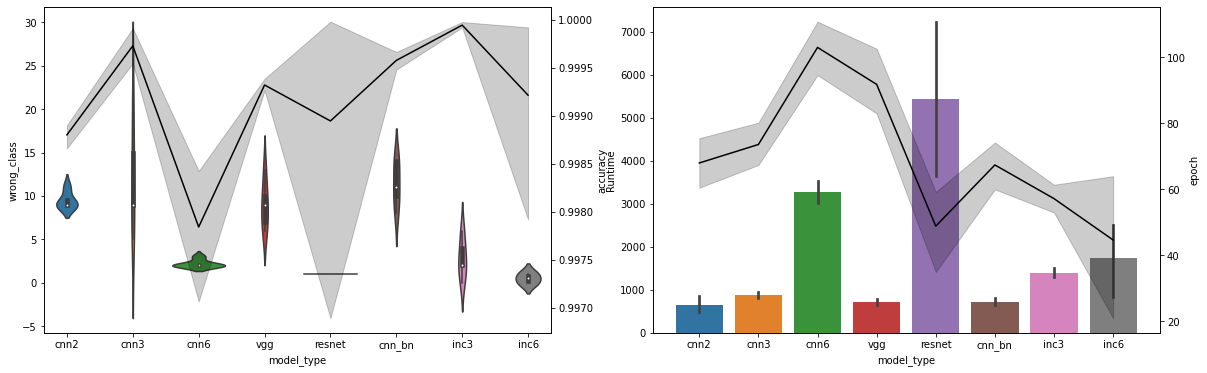

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.violinplot(x='model_type', y='wrong_class', data=df, ax=ax[0])
ax1 = ax[0].twinx()
sns.lineplot(x='model_type', y='accuracy', color='black', data=df, ax=ax1)
sns.barplot(x='model_type', y='Runtime', data=df, ax=ax[1])
ax2 = ax[1].twinx()
sns.lineplot(x='model_type', y='epoch', color='black', data=df, ax=ax2)
plt.savefig('results/accuracy_runtime.png', dpi=300, bbox_inches='tight')

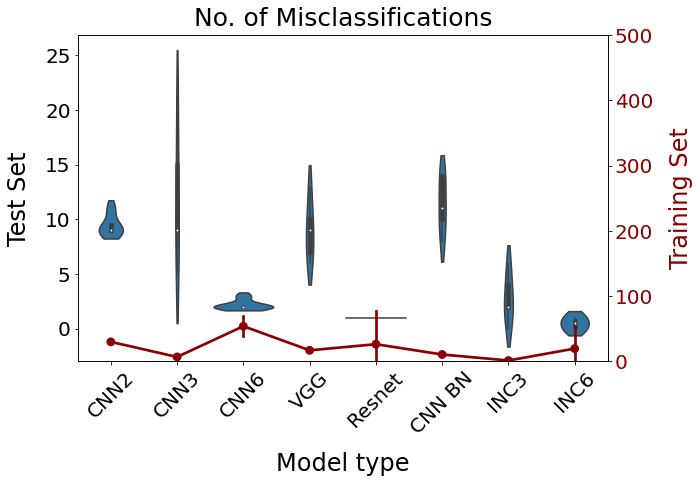

In [15]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(9.5, 6))
ax = plt.gca()
sns.violinplot(x='model_type', y='wrong_class', data=df, ax=ax, color=sns.color_palette()[0], cut=0.99, width=0.9)
ax1 = ax.twinx()
#sns.lineplot(x='model_type', y='miscl_train', color='darkred', data=df, ax=ax1)
sns.pointplot(x='model_type', y='miscl_train', color='darkred', data=df, ax=ax1)
ax1.set_ylim(0,500)
ax.set_ylabel('Test Set', fontsize=24, labelpad=14)
ax1.set_yticks([0,100,200,300,400,500], [0,100,200,300,400,500], color='darkred')
ax1.set_ylabel('Training Set', fontsize=24, color='darkred', labelpad=16)
plt.xticks(np.arange(8),['CNN2','CNN3','CNN6','VGG','Resnet','CNN BN', 'INC3', 'INC6'], fontsize=24, rotation=45)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Model type', fontsize=24, labelpad=14)
plt.title('No. of Misclassifications', fontsize=25, y=1.01)
plt.savefig('results/misclassifications.png', dpi=300, bbox_inches='tight')
plt.show()